In [ ]:
# ex03_iris 데이터 활용

### 목표
 - iris 데이터를 활용해서 붓꽃 품종을 분류해보자
 - 신경망에서 다중분류 학습하는 모델을 설계해보자 
 

In [ ]:
# warning 없애기
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# 환경셋팅
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris


In [ ]:
# 데이터 살펴보기
data = load_iris()
# bunch 객체 - 데이터의 묶음
# {키 : 값}
# 키값을 확인
data.keys()

# 번치객체 - data, target (필수)
# target_names, feature_names .... (옵션)

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
# 특성 확인
data.feature_names
# ['sepal length (cm)', 꽃받침의 길이
# 'sepal width (cm)', 꽃받침의 너비
# 'petal length (cm)', 꽃잎의 길이
# 'petal width (cm)'] 꽃잎의 너비
print('특성의 개수 : ', len(data.feature_names))
# 딥러닝 입력층에 연결되는 특성의 개수는 4
# 입력 차원 (input_dim) 매개변수에 연결되어져야함

특성의 개수 :  4


In [ ]:
# data 확인
data.data
#data['data]

In [ ]:
# 답 데이터 확인
data.target_names
# ['setosa', 'versicolor', 'virginica']
print('클래스의 개수는?', data.target_names.size)
# 딥러닝 출력층 각 클래스에 대한 확률
# 출력층 퍼셉트론 개수 클래스의 개수만큼 설정

클래스의 개수는? 3


In [ ]:
# 답 형식 확인
data.target
# ['setosa' : 0, 'versicolor' : 1, 'virginica' : 2]
# 랜덤샘플링 -> train_test_split 1, 무작위로 섞음 2, train, test 분리

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
# 훈련, 테스트 데이터 분리
# 8:2
# 3
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target,test_size = 0.2, random_state=3)

# 크기확인
print('훈련용 문제 : ', X_train.shape)
print('테스트용 문제 : ', X_test.shape)


훈련용 문제 :  (120, 4)
테스트용 문제 :  (30, 4)


In [ ]:
# 답 데이터 원핫인코딩
y_train_oh = pd.get_dummies(y_train)
y_test_oh = pd.get_dummies(y_test)
# pandas 원핫인코딩 함수 => pd.get_dummies() * pandas 형식으로 출력
# keras 제공 원힛인코딩함수 => to_categorical() * ndarray 형식으로 출력
# from tensorflow.keras.utils import to_categorical

# 크기확인 
print(y_train_oh.shape)
print(y_test_oh.shape)

(120, 3)
(30, 3)


In [32]:
from ast import mod
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

# 1. 신경망 뼈대 구축
model = Sequential()

# 입력층 + 중간층 1 설정
# 뉴런 16, 입력 특성 개수 4개, 활성화 sigmoid
model.add(Dense(units=16, input_dim = 4, activation = 'relu'))
# sigmoid가 학습에 영향을 잘 못 줌 -> 성능 개선이 잘 안됨 relu로 바꿔줌

# 중간층 2개 
# 32, 활성화 sigmoid
# 10, 활성화 sigmoid
model.add(Dense(units=32, activation = 'relu'))
model.add(Dense(units=10, activation = 'relu'))

# 출력층 
# 다중 분류 : 
# class 3개 -> 출력층 유닛 개수 3개
# 활성화 softmax
model.add(Dense(units=3, activation = 'softmax'))

# 모델 요약 정보
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 16)                80        
                                                                 
 dense_5 (Dense)             (None, 32)                544       
                                                                 
 dense_6 (Dense)             (None, 10)                330       
                                                                 
 dense_7 (Dense)             (None, 3)                 33        
                                                                 
Total params: 987
Trainable params: 987
Non-trainable params: 0
_________________________________________________________________


In [33]:
# 2. 학습/평가 방법 설정
# compile(loss 오차계산, optimizer 최적화함수 : w/b의 위치를 변경, metrics 평가지표)
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',  # 경사하강법 종류 중 1 - 확률적 경사하강
              # 좋은 w,b 를 찾아내는 힘이 부족할 수 있음
              metrics = ['accuracy'] ) # 평가지표 정확도

In [ ]:
# 3. 학습 및 시각화
# 훈련 문제, 훈련답, 200
h2 = model.fit(X_train, y_train_oh, epochs=200)

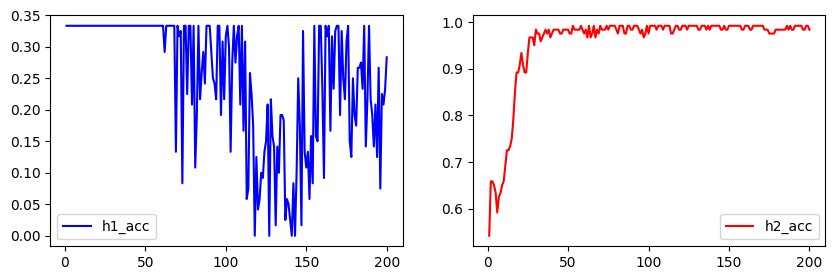

In [37]:
# 학습 현황 acc 변동 시각화
# 선그래프 그리기
plt.figure(figsize = (10,3))
plt.subplot(1,2,1)
plt.plot(range(1,201),h1.history['accuracy'], label = 'h1_acc', color = 'b')
plt.legend()

plt.subplot(1,2,2)
plt.plot(range(1,201),h2.history['accuracy'], label = 'h2_acc', color = 'r')
plt.legend()
plt.show()

In [40]:
# 평가
model.evaluate(X_test, y_test_oh)[1]

1/1 [==============================] - 0s 25ms/step - loss: 0.0500 - accuracy: 0.9667


0.9666666388511658

In [43]:
# 예측
# predict
pred = model.predict(X_test)
np.argmax(pred[0]) # 제일 큰 값을 가지고 있는 위치 출력 : np.argmax() ==> 클래스값 확인

1/1 [==============================] - 0s 32ms/step


0

In [44]:
pred.shape

(30, 3)

In [45]:
X_test.shape

(30, 4)